In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Logistic Regression Implementation in Dataset
## Reading the file

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### Null values

In [4]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Duplicate Values

In [5]:
df.duplicated().sum()

0

## Outlier Analysis

In [6]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


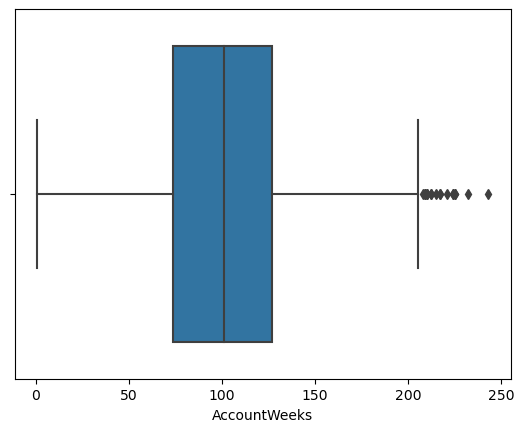

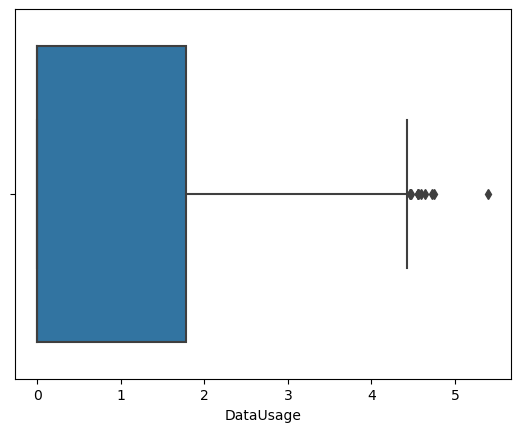

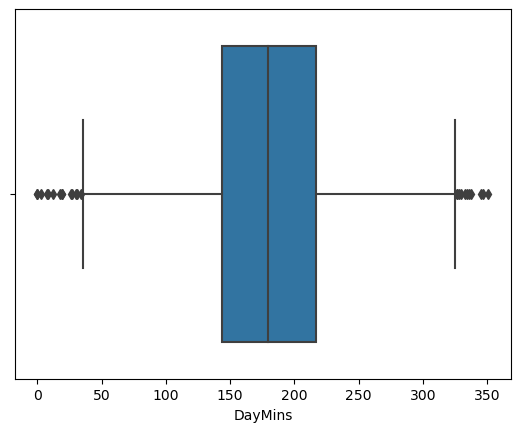

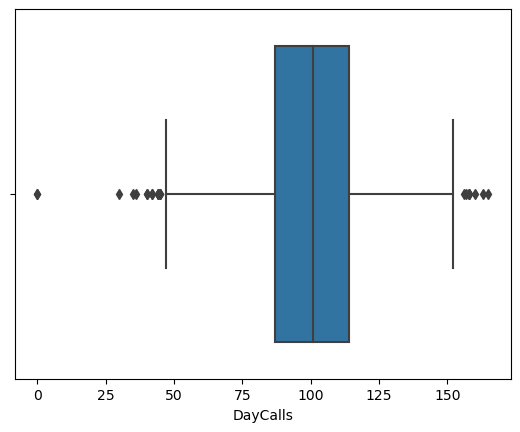

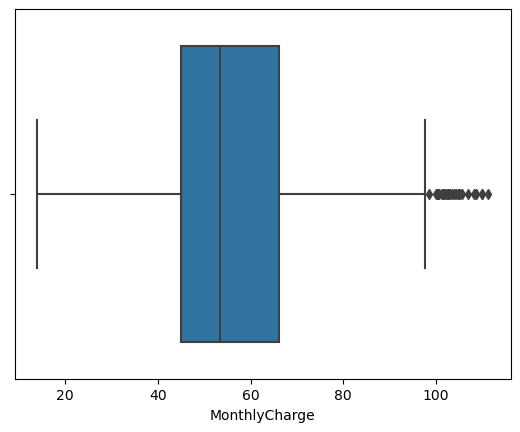

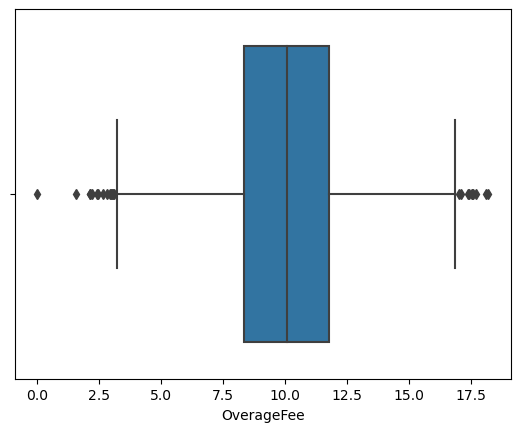

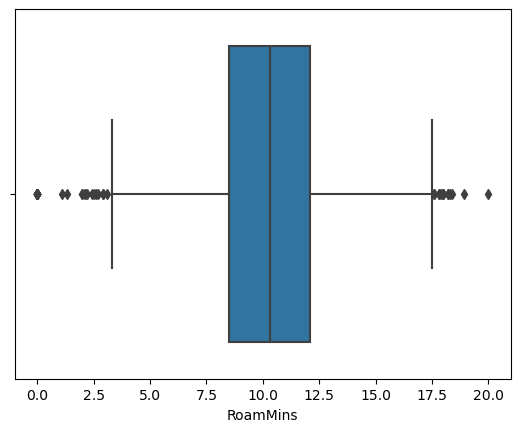

In [7]:
columns_outlier =['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
for column in columns_outlier:
    sns.boxplot(x=column,data=df)
    plt.show()

## EDA

In [8]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [9]:
cont_columns=['AccountWeeks','DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
cata_columns=list(set(df.columns)-set(cont_columns))
print("cont_columns : ",cont_columns)
print("cata_columns : ",cata_columns)

cont_columns :  ['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
cata_columns :  ['CustServCalls', 'Churn', 'ContractRenewal', 'DataPlan']


## Univariate Analysis

#### Continuous Data

Skew :  0.09660629423135147


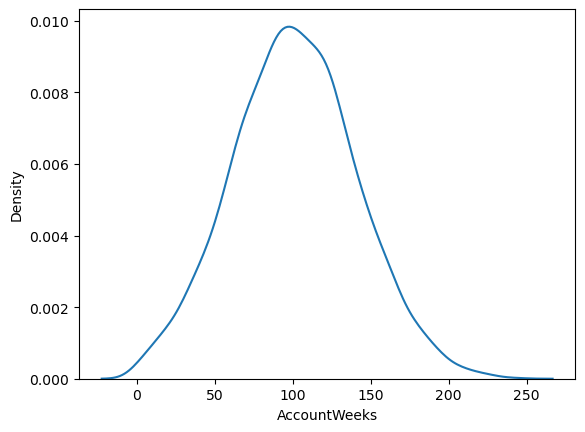

****************************************************************************************************
Skew :  1.2720573148196221


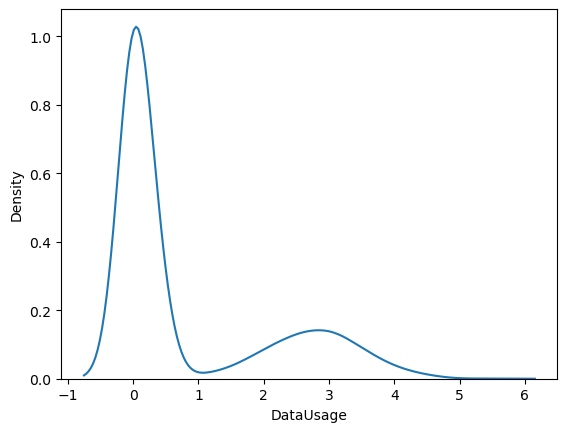

****************************************************************************************************
Skew :  -0.029077067143188955


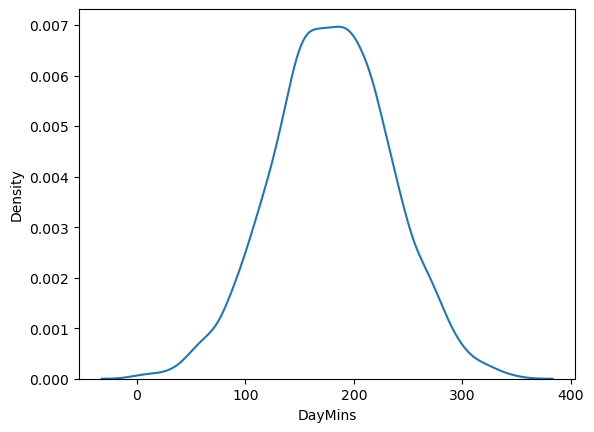

****************************************************************************************************
Skew :  -0.11178663903979906


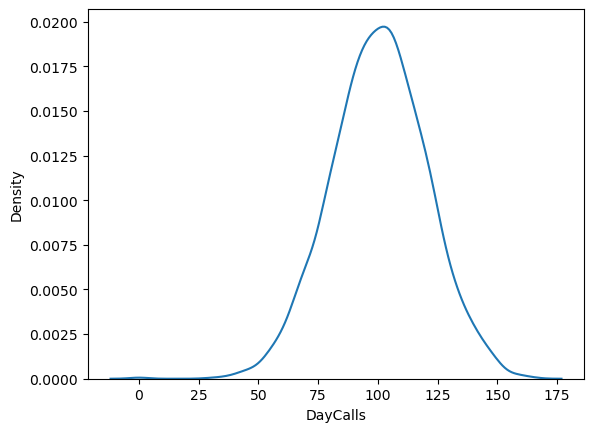

****************************************************************************************************
Skew :  0.5944978034514257


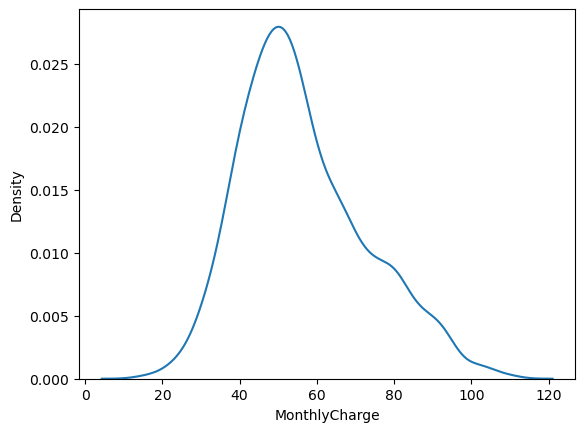

****************************************************************************************************
Skew :  -0.02384534080984628


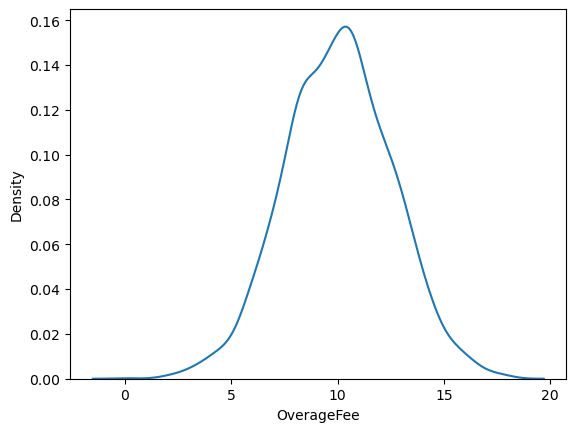

****************************************************************************************************
Skew :  -0.2451359394861856


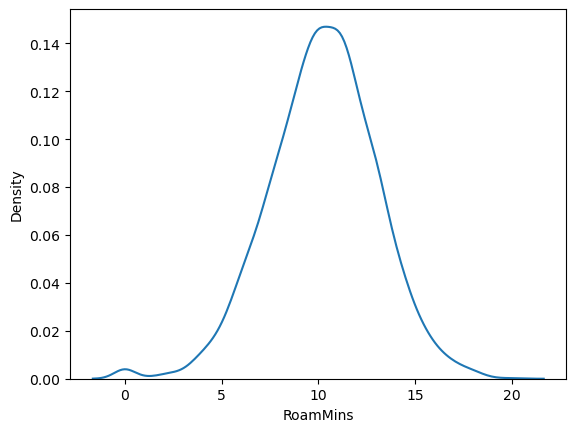

****************************************************************************************************


In [10]:
for col in cont_columns:
    print("Skew : ",df[col].skew())
    sns.kdeplot(x=col,data=df)
    plt.show()
    print("*"*100)

In [11]:
for col in cont_columns:
    print(col," : ",df[col].skew())

AccountWeeks  :  0.09660629423135147
DataUsage  :  1.2720573148196221
DayMins  :  -0.029077067143188955
DayCalls  :  -0.11178663903979906
MonthlyCharge  :  0.5944978034514257
OverageFee  :  -0.02384534080984628
RoamMins  :  -0.2451359394861856


In [12]:
# DataUsage is Right skewed
# AccountWeeks,DayMins,DayCalls,OverageFee,RoamMins low skewed
# MonthlyCharge moderately Right skewed
# All continuous columns are normally distributed 

#### Categorical Data

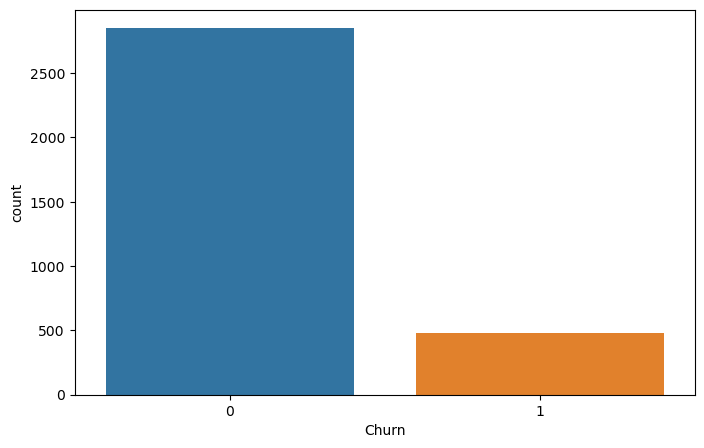

****************************************************************************************************


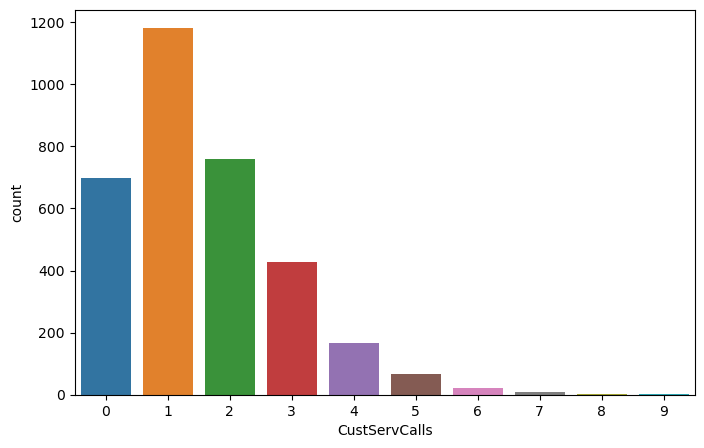

****************************************************************************************************


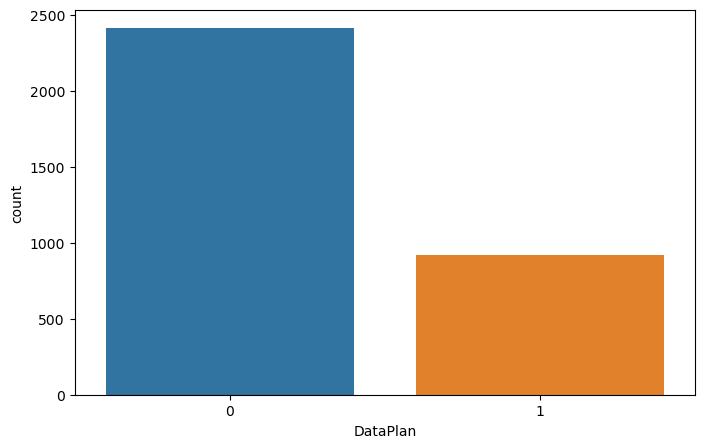

****************************************************************************************************


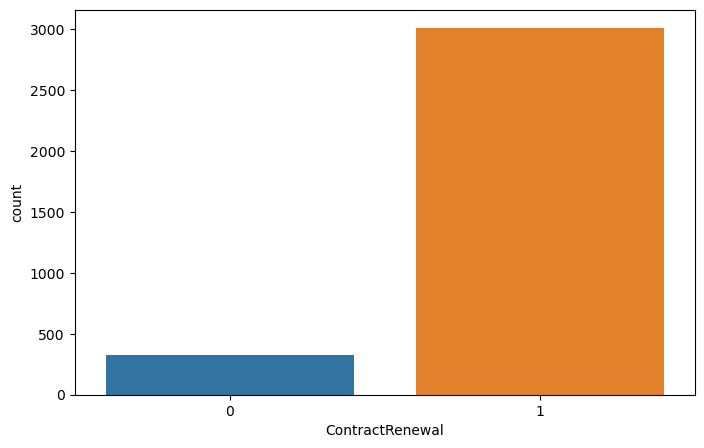

****************************************************************************************************


In [13]:
for col in cata_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=df)
    plt.show()
    print("*"*100)

In [14]:
for col in cata_columns:
    print(col)
    print(df[col].value_counts(normalize=True).round(2))
    print("*"*50)

Churn
0    0.86
1    0.14
Name: Churn, dtype: float64
**************************************************
CustServCalls
1    0.35
2    0.23
0    0.21
3    0.13
4    0.05
5    0.02
6    0.01
7    0.00
9    0.00
8    0.00
Name: CustServCalls, dtype: float64
**************************************************
DataPlan
0    0.72
1    0.28
Name: DataPlan, dtype: float64
**************************************************
ContractRenewal
1    0.9
0    0.1
Name: ContractRenewal, dtype: float64
**************************************************


## Bivariate Analysis

### Target veriable(Churn) vs Independent veriable(Other)

#### Target veriable(Churn) vs Continuous data

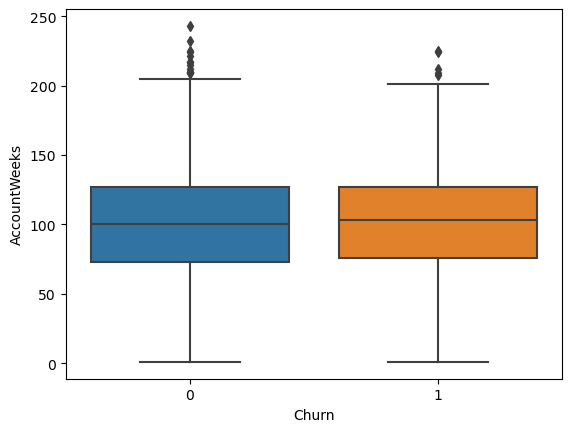

****************************************************************************************************


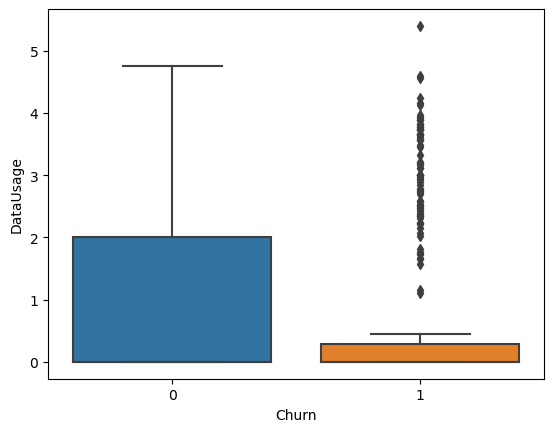

****************************************************************************************************


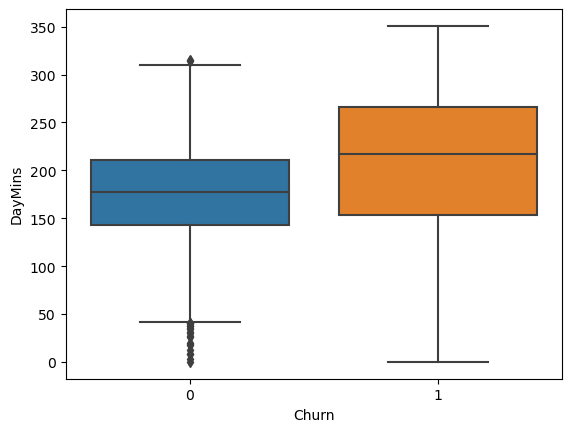

****************************************************************************************************


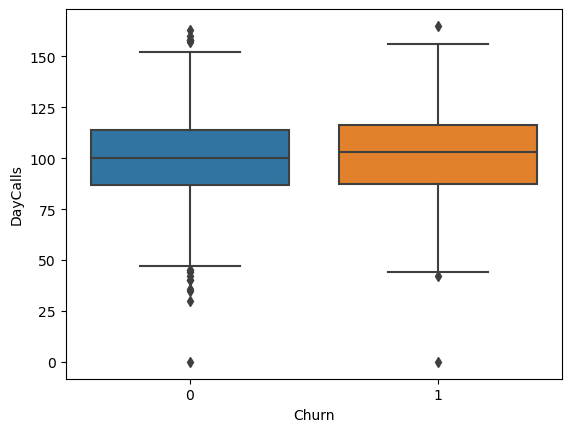

****************************************************************************************************


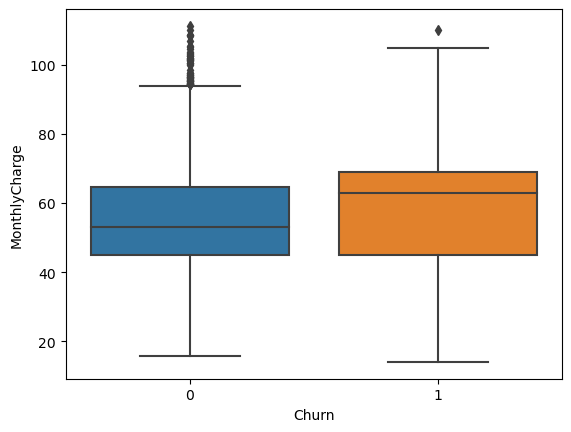

****************************************************************************************************


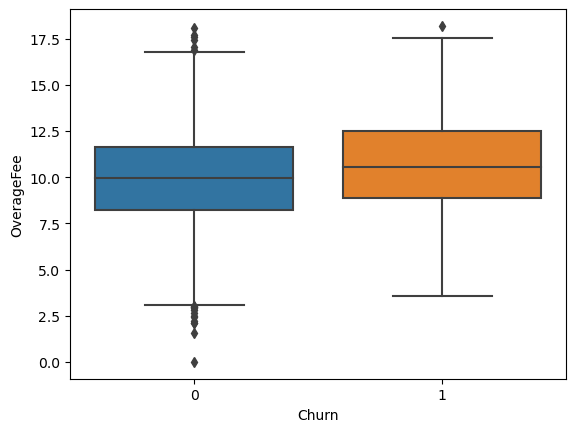

****************************************************************************************************


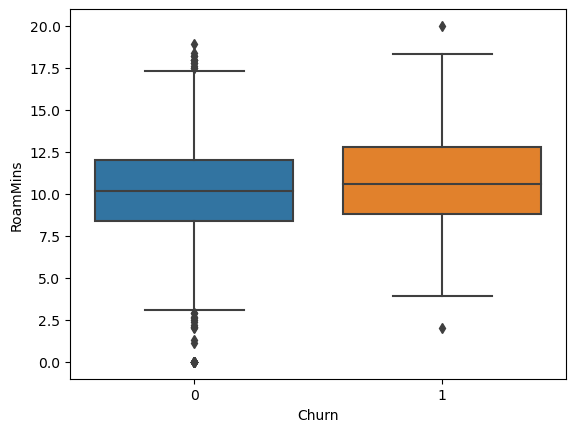

****************************************************************************************************


In [15]:
for col in cont_columns:
    sns.boxplot(x='Churn',y=col,data=df)
    plt.show()
    print("*"*100)

In [16]:
# Churn rate 1 is very low for DataUsage
# Churn rate 1 is higher for DayMins, MonthlyCharge, OverageFee, RoamMins 
# AccountWeeks & DayCalls have no impact on Churn rate

#### Target veriable(Churn) vs Categorical data

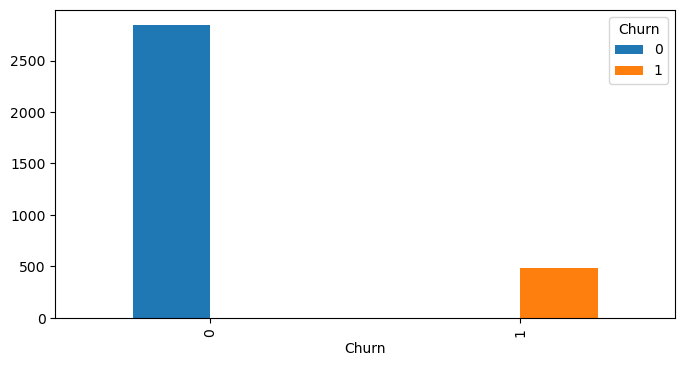

*****************************************************************************************************************************


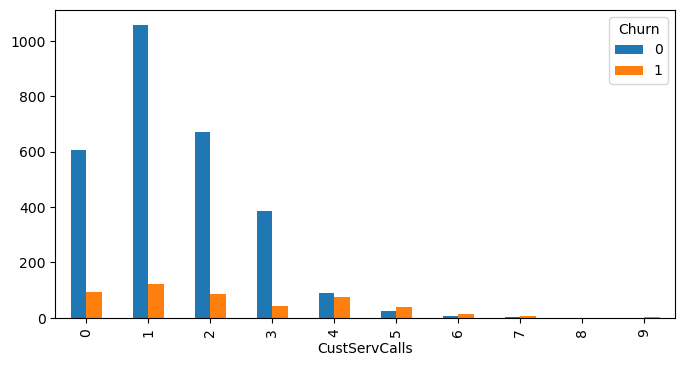

*****************************************************************************************************************************


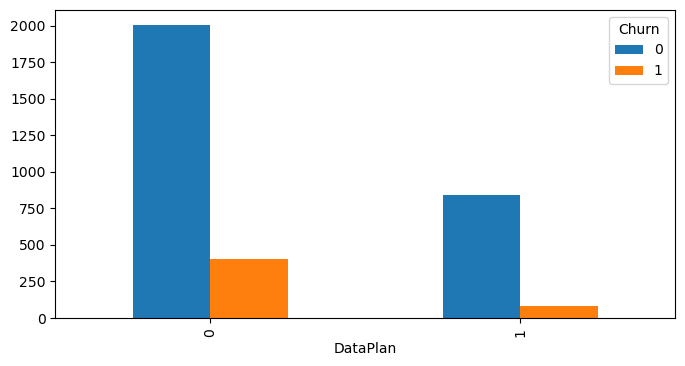

*****************************************************************************************************************************


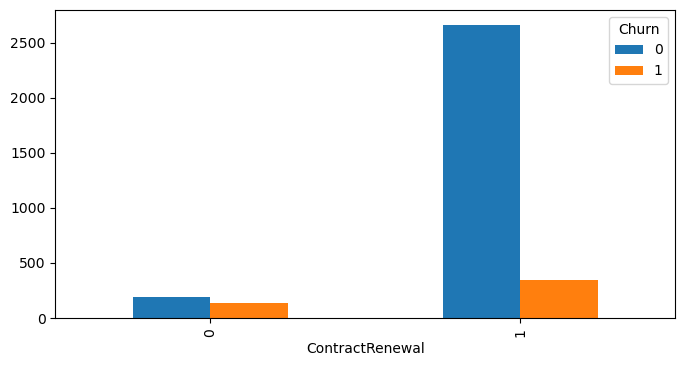

*****************************************************************************************************************************


In [17]:
for col in cata_columns:
    pd.crosstab(df[col],df['Churn']).plot(kind='bar',figsize=(8,4))
    plt.show()
    print("*"*125)

In [18]:
cata_columns

['Churn', 'CustServCalls', 'DataPlan', 'ContractRenewal']

In [19]:
print(df.groupby(['Churn'])['DataPlan'].value_counts())
print("*"*100)
print(df.groupby(['Churn'])['ContractRenewal'].value_counts())
print("*"*100)
print(df.groupby(['Churn'])['CustServCalls'].value_counts())
print("*"*100)

Churn  DataPlan
0      0           2008
       1            842
1      0            403
       1             80
Name: DataPlan, dtype: int64
****************************************************************************************************
Churn  ContractRenewal
0      1                  2664
       0                   186
1      1                   346
       0                   137
Name: ContractRenewal, dtype: int64
****************************************************************************************************
Churn  CustServCalls
0      1                1059
       2                 672
       0                 605
       3                 385
       4                  90
       5                  26
       6                   8
       7                   4
       8                   1
1      1                 122
       0                  92
       2                  87
       4                  76
       3                  44
       5                  40
       6          

## Scaling 

In [20]:
# Scaling  - Continuous data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()
num_col = cont_columns + ['CustServCalls']
x_con_scaled = pd.DataFrame(ss.fit_transform(df[num_col]), columns=num_col, index=df.index)
x_con_scaled

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,CustServCalls
0,0.676489,1.480204,1.566767,0.476643,1.990727,-0.071584,-0.085008,-0.427932
1,0.149065,2.266072,-0.333738,1.124503,1.564510,-0.107082,1.240482,-0.427932
2,0.902529,-0.641642,1.168304,0.675985,-0.262133,-1.574346,0.703121,-1.188218
3,-0.428590,-0.641642,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0.332354
4,-0.654629,-0.641642,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,1.092641
...,...,...,...,...,...,...,...,...
3328,2.283878,1.456628,-0.432895,-1.167924,0.937363,0.287344,-0.120832,0.332354
3329,-0.830437,-0.374447,0.942447,-2.164631,0.005775,-0.939320,-0.228304,1.092641
3330,-1.835055,-0.641642,0.018820,0.426808,-0.018581,1.730942,1.383778,0.332354
3331,2.082955,-0.641642,0.624778,0.227466,-0.383909,-0.817048,-1.876211,0.332354


In [23]:
cata_columns.remove('Churn')
cata_columns.remove('CustServCalls')
cata_columns

['DataPlan', 'ContractRenewal']

### Mearg x_con_scaled & cata_columns

In [24]:
x_final = pd.concat([x_con_scaled,df[cata_columns]],axis=1)
x_final.head()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,CustServCalls,DataPlan,ContractRenewal
0,0.676489,1.480204,1.566767,0.476643,1.990727,-0.071584,-0.085008,-0.427932,1,1
1,0.149065,2.266072,-0.333738,1.124503,1.564510,-0.107082,1.240482,-0.427932,1,1
2,0.902529,-0.641642,1.168304,0.675985,-0.262133,-1.574346,0.703121,-1.188218,0,1
3,-0.428590,-0.641642,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0.332354,0,0
4,-0.654629,-0.641642,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,1.092641,0,0


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = df['Churn']

In [68]:
# Training - 80%, Testing = 20% (Random selection of train_test_split)
x_train ,x_test ,y_train, y_test = train_test_split( x_final,y, test_size=0.2,random_state=10)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2666, 10) (2666,)
(667, 10) (667,)


## Logistic Regression Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression(penalty='l2',C=1.0, class_weight='balanced',fit_intercept=True)
log_reg.fit(x_train ,y_train)

LogisticRegression(class_weight='balanced')

In [49]:
print("Intercept    : " ,log_reg.intercept_)
print("Coefficients : " ,log_reg.coef_)

Intercept    :  [1.83810556]
Coefficients :  [[ 0.0485308  -0.1634792   0.46770904  0.06732709  0.33608876  0.2721395
   0.12762187  0.76076783 -1.13243963 -2.29051327]]


In [52]:
y_test_pred = log_reg.predict(x_test)

## Confusion Metrics

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

[[440 132]
 [ 26  69]]


<Axes: >

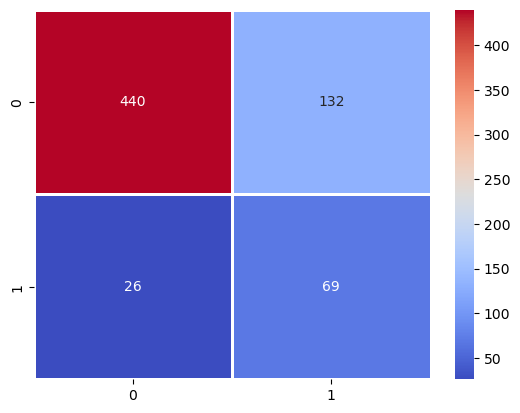

In [54]:
print(confusion_matrix(y_teat,y_test_pred))
sns.heatmap(confusion_matrix(y_teat,y_test_pred), fmt='.0f',annot=True,cmap='coolwarm', linecolor='white',linewidths=1)

In [55]:
print(classification_report(y_teat,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       572
           1       0.34      0.73      0.47        95

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



## ROC Curve

In [56]:
from sklearn.metrics import roc_curve,roc_auc_score

In [59]:
y_test_pred_prob = log_reg.predict_proba(x_test)[:,1]
fpr,tpr,thresh = roc_curve(y_test,y_test_pred_prob,drop_intermediate=True)  # Y_act,y_pred_prob
roc_df = pd.DataFrame({'TPR':tpr,"FPR":fpr,'Threshold':thresh})
roc_df

,TPR,FPR,Threshold
0,0.000000,0.000000,1.986123
1,0.010526,0.000000,0.986123
2,0.021053,0.000000,0.982941
3,0.021053,0.003497,0.962122
4,0.031579,0.003497,0.952091
...,...,...,...
137,0.978947,0.807692,0.142655
138,0.989474,0.807692,0.138323
139,0.989474,0.867133,0.113834
140,1.000000,0.867133,0.113480


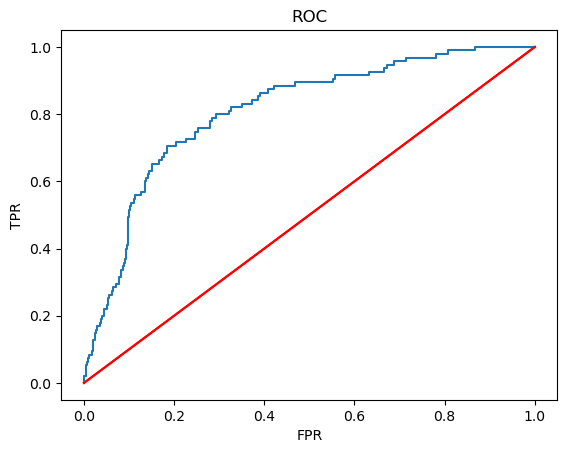

In [60]:
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(roc_df['FPR'],roc_df['TPR'])
plt.plot([[0,0],[1,1]],color='red')
plt.show()

In [61]:
print('ROC_AUC:',roc_auc_score(y_test,y_test_pred_prob))

ROC_AUC: 0.8101582627898418


## Train & Test Score

In [62]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

Train confusion Matrix:


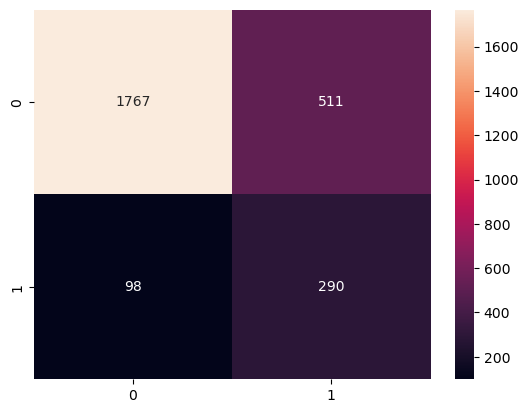

Test confusion Matrix:


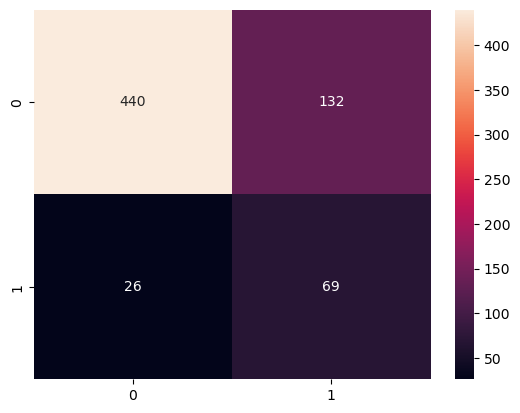

In [63]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [64]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.85      2278
           1       0.36      0.75      0.49       388

    accuracy                           0.77      2666
   macro avg       0.65      0.76      0.67      2666
weighted avg       0.86      0.77      0.80      2666

----------------------------------------------------------------------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       572
           1       0.34      0.73      0.47        95

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



In [65]:
y_train_pred_prob = log_reg.predict_proba(x_train)[:,1]
y_test_pred_prob = log_reg.predict_proba(x_test)[:,1]

In [66]:
print('Train ROC:',roc_auc_score(y_train,y_train_pred_prob))
print('Test ROC:',roc_auc_score(y_test,y_test_pred_prob))

Train ROC: 0.8243066806658038
Test ROC: 0.8101582627898418


In [67]:
# Train : f1-score weighted avg  80%
# Test  : f1-score weighted avg  79%
# Very less impact of overfitting

## Cross validation Score

In [69]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(log_reg,x_train,y_train,scoring='f1_weighted',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [0.80004066 0.80217805 0.80020121 0.78881525 0.80162287]
Avg Score: 0.7985716079826871
Std Score: 0.004946045479335506


In [76]:
scores = cross_val_score(log_reg,x_train,y_train,scoring='roc_auc',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [0.78342892 0.82071656 0.82698223 0.81766695 0.8275007 ]
Avg Score: 0.8152590740343777
Std Score: 0.016346438837052963


In [77]:
# Model is having constant performance in all the splits

## Finding model threshold by ROC

In [79]:
roc_df.head()

,TPR,FPR,Threshold
0,0.000000,0.000000,1.986123
1,0.010526,0.000000,0.986123
2,0.021053,0.000000,0.982941
3,0.021053,0.003497,0.962122
4,0.031579,0.003497,0.952091


In [80]:
roc_df['Difference'] = roc_df['TPR']-roc_df['FPR']
roc_df[roc_df['Difference']==max(roc_df['Difference'])]

,TPR,FPR,Threshold,Difference
88,0.705263,0.183566,0.568701,0.521697


In [81]:
# 0.568 is optimal threshold for this data.

## Choosing threshold by a performance metric

In [82]:
from sklearn.metrics import recall_score,precision_score

In [83]:
thresholds = np.arange(0,1.1,0.01)
recall_list = []
precision_list = []
for th in thresholds:
    y_pred_class = [0 if pval < th else 1 for pval in y_test_pred_prob]
    recall_list.append(recall_score(y_test,y_pred_class))
    precision_list.append(precision_score(y_test,y_pred_class))

C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

In [84]:
recall_df = pd.DataFrame({'Threshold':thresholds,'Recall':recall_list,'Precision':precision_list})
recall_df

,Threshold,Recall,Precision
0,0.00,1.0,0.142429
1,0.01,1.0,0.142429
2,0.02,1.0,0.142643
3,0.03,1.0,0.143722
4,0.04,1.0,0.144377
...,...,...,...
105,1.05,0.0,0.000000
106,1.06,0.0,0.000000
107,1.07,0.0,0.000000
108,1.08,0.0,0.000000


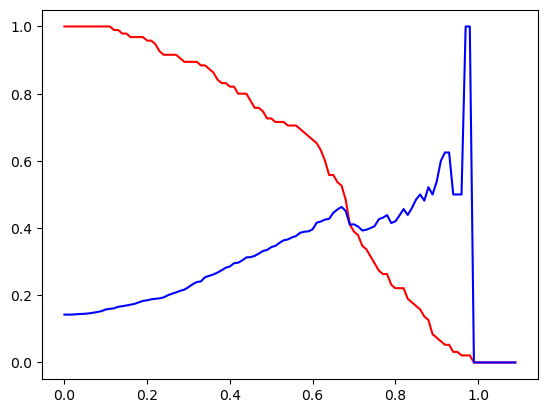

In [85]:
plt.plot(thresholds,recall_list,color='red')
plt.plot(thresholds,precision_list,color='blue')

## Intrepreting Co-efficients in Logistic Regression

In [86]:
print('Intercept:',log_reg.intercept_)
print('Coefficients:',log_reg.coef_[0])

Intercept: [1.83810556]
Coefficients: [ 0.0485308  -0.1634792   0.46770904  0.06732709  0.33608876  0.2721395
  0.12762187  0.76076783 -1.13243963 -2.29051327]


In [87]:
co_ef_df = pd.DataFrame({'Colums':x_final.columns,'Co_eff':log_reg.coef_[0]})
co_ef_df['exp_coef'] = np.exp(co_ef_df['Co_eff'])
co_ef_df

,Colums,Co_eff,exp_coef
0,AccountWeeks,0.048531,1.049728
1,DataUsage,-0.163479,0.849184
2,DayMins,0.467709,1.596333
3,DayCalls,0.067327,1.069645
4,MonthlyCharge,0.336089,1.399463
5,OverageFee,0.272139,1.312770
6,RoamMins,0.127622,1.136123
7,CustServCalls,0.760768,2.139919
8,DataPlan,-1.132440,0.322246
9,ContractRenewal,-2.290513,0.101214
